# Assignment report - Camera Calibration with DLT
# NAME: YOU ZHOU

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## 1.1 Generate 3D scene points, and visualize the generated points
In this part, I use three different points$p 1(x 1, y 1, z 1), p 2(x 2, y 2, z 2), p 3(x 3, y 3, z 3)$ to identify a plane.


In [2]:
def plane_3d(point1, point2, point3):
    """We can use three diffrent points to identify a plane in 3D."""
    """This function will return a series of points that form a plane."""
    normal_vector = np.cross(point2 - point1, point3 - point1)
    if normal_vector[2] == 0:
        if normal_vector[1] == 0:
            z = np.linspace(point1[2], point1[2] + 5, 21)
            y = np.linspace(point1[1], point1[1] + 5, 21)
            Y, Z = np.meshgrid(y, z)
            X = Y * 0
            return (X, Y, Z)
        x = np.linspace(point1[0], point1[0] + 5, 21)
        z= np.linspace(point1[2], point1[2] + 5, 21)
        X, Z = np.meshgrid(x, z)
        Y = normal_vector[0] / normal_vector[1] * (X - point1[0]) + point1[1]
        return (X, Y, Z)
    x = np.linspace(point1[0], point1[0] + 5, 21)
    y = np.linspace(point1[1], point1[1] + 5, 21)
    X,Y = np.meshgrid(x, y)
    Z = -(normal_vector[0]*(X - point1[0]) + normal_vector[1] * (Y - point1[1])) / normal_vector[2] + point1[2]
    return (X, Y, Z)
def points_3d(point):
    X, Y, Z = plane_3d(point[0], point[1], point[2])
    NX = X.reshape((21*21,1))
    NY = Y.reshape((21*21,1))
    NZ = Z.reshape((21*21,1))
    XY = np.concatenate((NX, NY), axis=1)
    plane_points = np.concatenate((XY, NZ), axis=1)
    return plane_points

In [3]:
three_points = np.array([[0, 0, 0], [10, 0, 10], [10, 10, 10]])
plane_points = points_3d(three_points)
plane_points

array([[0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.25],
       [0.5 , 0.  , 0.5 ],
       ...,
       [4.5 , 5.  , 4.5 ],
       [4.75, 5.  , 4.75],
       [5.  , 5.  , 5.  ]])

## 1.2 This part is to visualize the points that generated

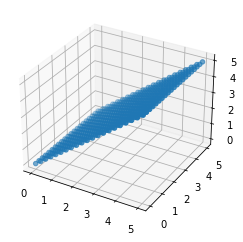

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(plane_points[:,0], plane_points[:,1], plane_points[:,2], cmap='Blues')

## 1.3 This part is to generate the projection matrix of the camera, using the he parameters used in our last assignment

### 1.3.1 this function is to get the extrinsic parameters

In [5]:
def get_Mext(rotate_x = 0, rotate_y = 0, rotate_z = 0, translation = np.array([[0, 0, 0]])):
    Mrx = np.array([[1, 0, 0], [0, math.cos(rotate_x), -math.sin(rotate_x)], 
                   [0, math.sin(rotate_x), math.cos(rotate_x)]])
    Mry = np.array([[math.cos(rotate_y), 0, math.sin(rotate_y)], [0, 1, 0],
                  [-math.sin(rotate_y), 0, math.cos(rotate_y)]])
    Mrz = np.array([[math.cos(rotate_z), -math.sin(rotate_z), 0],
                  [math.sin(rotate_z), math.cos(rotate_z), 0], [0, 0, 1]])
    Mro = Mrx @ Mry @ Mrz
    print("The rotation matrix:")
    print(Mro)
    M = np.concatenate((Mro, translation.T), axis=1)
    b = np.array([[0, 0, 0, 1]])
    M = np.concatenate((M, b), axis=0)
    return M

In [6]:
Mext = get_Mext(math.pi/2, 0, 0, np.array([[1, 0, 2]])) #using the parameters of last assignment

The rotation matrix:
[[ 1.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00]
 [ 0.000000e+00  1.000000e+00  6.123234e-17]]


In [7]:
Mext

array([[ 1.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00],
       [ 0.000000e+00,  6.123234e-17, -1.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  1.000000e+00,  6.123234e-17,  2.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]])

### 1.3.2 this function is to get the intrinsic parameters

In [8]:
def get_Mint(focal_length_x, focal_length_y, shear = 0, focal_point = np.array([0, 0])):
    return np.array([[focal_length_x, shear, focal_point[0], 0],
                    [0, focal_length_y, focal_point[1], 0],
                    [0, 0, 1, 0]])
    

In [9]:
Mint = get_Mint(100, 100, 0, np.array([25, 25])) #using the parameters of last assignment

In [10]:
Mint

array([[100,   0,  25,   0],
       [  0, 100,  25,   0],
       [  0,   0,   1,   0]])

### the projection matrix

In [11]:
projection_M = Mint @ Mext
projection_M

array([[ 1.0000000e+02,  2.5000000e+01,  1.5308085e-15,  1.5000000e+02],
       [ 0.0000000e+00,  2.5000000e+01, -1.0000000e+02,  5.0000000e+01],
       [ 0.0000000e+00,  1.0000000e+00,  6.1232340e-17,  2.0000000e+00]])

### adding another column full of ones so the numbers can be computed 

In [12]:
length = np.shape(plane_points)[0]
plane_points1 = np.c_[plane_points, np.ones(length) ]   
plane_points1

array([[0.  , 0.  , 0.  , 1.  ],
       [0.25, 0.  , 0.25, 1.  ],
       [0.5 , 0.  , 0.5 , 1.  ],
       ...,
       [4.5 , 5.  , 4.5 , 1.  ],
       [4.75, 5.  , 4.75, 1.  ],
       [5.  , 5.  , 5.  , 1.  ]])

In [13]:
np.shape(plane_points1)

(441, 4)

## 1.4 getting the coordinates that in the image

In [14]:
projected_points = projection_M @ plane_points1.T
projected_points = projected_points / projected_points[2]
projected_points = projected_points.T
projected_points

array([[ 75.        ,  25.        ,   1.        ],
       [ 87.5       ,  12.5       ,   1.        ],
       [100.        ,   0.        ,   1.        ],
       ...,
       [103.57142857, -39.28571429,   1.        ],
       [107.14285714, -42.85714286,   1.        ],
       [110.71428571, -46.42857143,   1.        ]])

## Q: Are all image points within the image? You can modify the camera parameters to ensure so.
we can see from the picture that some coordinates are more than 100 or less than 0, which is impossible. The coordinates should less than 100 and bigger than 0

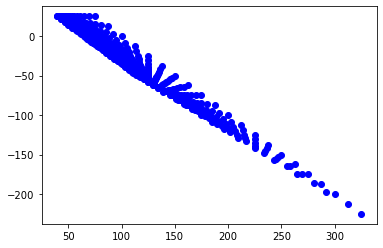

In [15]:
fig = plt.figure()
ax.set_facecolor('black')
plt.plot(projected_points[:, 0], projected_points[:, 1], 'bo')

### We can use this function below to help us to get the points that are in the image. 

In [16]:
def get_points_on_image(projected_points, ori_points):
    on_img_projected_points = np.empty((0,2))
    on_img_origin_points = np.empty((0,3))
    length = np.shape(projected_points)[0]
    for i in range(length):
        if projected_points[i][0] <=100 and projected_points[i][0] >=0 and projected_points[i][1] <=100 and projected_points[i][1] >= 0 :
            on_img_projected_points = np.append(on_img_projected_points, np.array([[projected_points[i][0], projected_points[i][1]]]) , axis=0)
            on_img_origin_points = np.append(on_img_origin_points, np.array([[ori_points[i][0], ori_points[i][1], ori_points[i][2]]]) , axis=0)
    return on_img_projected_points, on_img_origin_points

In [17]:
on_img_projected_points, on_img_plane_points = get_points_on_image(projected_points, plane_points)

In [18]:
on_img_plane_points.shape

(108, 3)

### The picture below shows the points that are on the image plane.

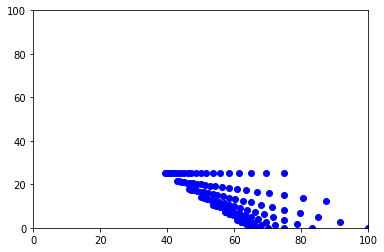

In [19]:
fig = plt.figure()
plt.xlim((0, 100))      
plt.ylim((0, 100))     
plt.plot(on_img_projected_points[:, 0], on_img_projected_points[:, 1], 'bo')


# 2.1 in this part, we are dealing with DLT
we asume that we only know two pairs of coordinates: *on_img_plane_points on_img_projected_points*

plane_points:(x, y, z, 1)
projected_points:(u, v, 1)


$\left[\begin{array}{c}\lambda u \\ \lambda v \\ \lambda\end{array}\right]=\mathrm{x}=M \mathrm{X}=\left[\begin{array}{c}A^{T} \\ B^{T} \\ C^{T}\end{array}\right] \mathrm{X}=\left[\begin{array}{c}A^{T} \mathrm{X} \\ B^{T} \mathrm{X} \\ C^{T} \mathrm{X}\end{array}\right]$

$u=\frac{A^{T} \mathrm{X}}{C^{T} \mathrm{X}}$

$v=\frac{B^{T} \mathrm{X}}{C^{T} \mathrm{X}}$

we can write that as 

$u C^{T} \mathrm{X}-A^{T} \mathrm{X}=0$

$v C^{T} \mathrm{X}-B^{T} \mathrm{X}=0$

which is

$\left[\begin{array}{cccccccccccc}-X & -Y & -Z & -1 & 0 & 0 & 0 & 0 & u X & u Y & u Z & u \\ 0 & 0 & 0 & 0 & -X & -Y & -Z & -1 & v X & v Y & v Z & v\end{array}\right]\left[\begin{array}{l}m_{11} \\ m_{12} \\ m_{13} \\ m_{14} \\ m_{21} \\ m_{22} \\ m_{23} \\ m_{24} \\ m_{31} \\ m_{32} \\ m_{33} \\ m_{34}\end{array}\right]=0$

## if all input points are in one plane, we assume the coordinate of z is 0, Other cases can actually be equated to this special case by rotating. It became: 

$\left[\begin{array}{cccccccccccc}-X & -Y & 0 & -1 & 0 & 0 & 0 & 0 & u X & u Y & 0 & u \\ 0 & 0 & 0 & 0 & -X & -Y & 0 & -1 & v X & v Y & 0 & v\end{array}\right]\left[\begin{array}{l}m_{11} \\ m_{12} \\ m_{13} \\ m_{14} \\ m_{21} \\ m_{22} \\ m_{23} \\ m_{24} \\ m_{31} \\ m_{32} \\ m_{33} \\ m_{34}\end{array}\right]=0$


## Obviously, the 3rd, 7th and 11th columns of the coefficient matrix are all zeros, then the corresponding m can take any value and there will be an infinite number of solutions.

## If all input points are in one plane, the ideal projection matrix cannot be solved, so we need to add a plane.

In [28]:
three_points = np.array([[0, 0, -1], [10, 0, 10], [10, 10, 10]])
plane_points2 = points_3d(three_points)
plane_points2 #the points on the second plane

array([[ 0.   ,  0.   , -1.   ],
       [ 0.25 ,  0.   , -0.725],
       [ 0.5  ,  0.   , -0.45 ],
       ...,
       [ 4.5  ,  5.   ,  3.95 ],
       [ 4.75 ,  5.   ,  4.225],
       [ 5.   ,  5.   ,  4.5  ]])

In [29]:
#planeplane_points10 means the points on the first plane and the second plane, not just one plane.
plane_points10 = np.concatenate((plane_points, plane_points2), axis=0)

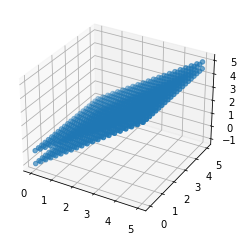

In [30]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(plane_points10[:,0], plane_points10[:,1], plane_points10[:,2], cmap='Blues')

In [31]:
length = np.shape(plane_points10)[0]
plane_points11 = np.c_[plane_points10, np.ones(length) ]   
plane_points11

array([[0.   , 0.   , 0.   , 1.   ],
       [0.25 , 0.   , 0.25 , 1.   ],
       [0.5  , 0.   , 0.5  , 1.   ],
       ...,
       [4.5  , 5.   , 3.95 , 1.   ],
       [4.75 , 5.   , 4.225, 1.   ],
       [5.   , 5.   , 4.5  , 1.   ]])

In [32]:
np.shape(plane_points11)

(882, 4)

In [42]:
#projected_points1 means the points projected on the first plane and the second plane, not just one plane.

projected_points1 = projection_M @ plane_points11.T
projected_points1 = projected_points1 / projected_points1[2]
projected_points1 = projected_points1.T
projected_points1

array([[ 75.        ,  25.        ,   1.        ],
       [ 87.5       ,  12.5       ,   1.        ],
       [100.        ,   0.        ,   1.        ],
       ...,
       [103.57142857, -31.42857143,   1.        ],
       [107.14285714, -35.35714286,   1.        ],
       [110.71428571, -39.28571429,   1.        ]])

In [43]:
np.shape(projected_points1)

(882, 3)

In [44]:
on_img_projected_points1, on_img_plane_points1 = get_points_on_image(projected_points1, plane_points11)

## The picture below shows the points of the two plane.

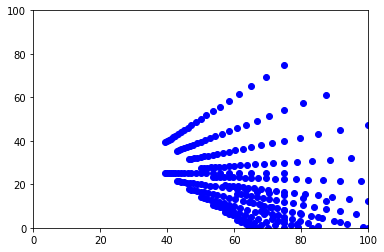

In [45]:
fig = plt.figure()
plt.xlim((0, 100))      
plt.ylim((0, 100)) 
plt.plot(on_img_projected_points1[:, 0], on_img_projected_points1[:, 1], 'bo')

In [46]:
length = np.shape(on_img_plane_points1)[0]
on_img_plane_points1 = np.c_[on_img_plane_points1, np.ones(length) ]   
on_img_projected_points1 = np.c_[on_img_projected_points1, np.ones(length) ]   

In [47]:
on_img_plane_points1.shape

(269, 4)

# This is the part for DLT algorithm
first, we need to do normalization

In [48]:
def normalization(points):
    mean = np.mean(points, 0)
    if np.shape(points)[1] == 3: #if the points are in 2d
        centerd = points - mean * np.ones(np.shape(points))      
        square = centerd * centerd
        distance = np.sqrt(square[:, 0] + square[:, 1])
        std = np.mean(distance)
        Tr1 = np.array([[1, 0, -mean[0]], [0, 1, -mean[1]], [0, 0, 1]])
        Tr2 = np.array([[math.sqrt(2) / std, 0, 0], [0, math.sqrt(2) / std, 0], [0, 0, 1]])
        Tr = Tr2 @ Tr1
        return ((Tr @ points.T).T, Tr)
    if np.shape(points)[1] == 4: #if 3d
        centerd = points - mean * np.ones(np.shape(points))      
        square = centerd * centerd
        distance = np.sqrt(square[:, 0] + square[:, 1] + square[:, 2])
        std = np.mean(distance)
        Tr1 = np.array([[1, 0, 0, -mean[0]], [0, 1, 0, -mean[1]], [0, 0, 1, -mean[2]], [0, 0, 0, 1]])
        Tr2 = np.array([[math.sqrt(3) / std, 0, 0, 0], [0, math.sqrt(3) / std, 0, 0], [0, 0, math.sqrt(3) / std, 0], [0, 0, 0, 1]])
        Tr =Tr2 @ Tr1
        return ((Tr @ points.T).T, Tr)

In [49]:
normalization_plane_points, nor_plane_tr = normalization(on_img_plane_points1)
normalization_projected_points, nor_proje_tr = normalization(on_img_projected_points1)

## This is the part for Solving a system of linear equations

$\left[\begin{array}{c}\lambda u \\ \lambda v \\ \lambda\end{array}\right]=\mathrm{x}=M \mathrm{X}=\left[\begin{array}{c}A^{T} \\ B^{T} \\ C^{T}\end{array}\right] \mathrm{X}=\left[\begin{array}{c}A^{T} \mathrm{X} \\ B^{T} \mathrm{X} \\ C^{T} \mathrm{X}\end{array}\right]$

$u=\frac{A^{T} \mathrm{X}}{C^{T} \mathrm{X}}$

$v=\frac{B^{T} \mathrm{X}}{C^{T} \mathrm{X}}$

we can write that as 

$u C^{T} \mathrm{X}-A^{T} \mathrm{X}=0$

$v C^{T} \mathrm{X}-B^{T} \mathrm{X}=0$

which is

$\left[\begin{array}{cccccccccccc}-X & -Y & -Z & -1 & 0 & 0 & 0 & 0 & u X & u Y & u Z & u \\ 0 & 0 & 0 & 0 & -X & -Y & -Z & -1 & v X & v Y & v Z & v\end{array}\right]\left[\begin{array}{l}m_{11} \\ m_{12} \\ m_{13} \\ m_{14} \\ m_{21} \\ m_{22} \\ m_{23} \\ m_{24} \\ m_{31} \\ m_{32} \\ m_{33} \\ m_{34}\end{array}\right]=0$




There are more equitions than the unknown parameters, so instead of using **numpy.linalg.solve** , we use singular value decomposition, which is SVD, to solve this kind of equitions. We can get least squares solution of the system.


In [51]:
def get_P_SVD(plane_points, projected_points, trPlane, trProje):
    """from the pairs get the martix of P"""
    A = []
    length = np.shape(plane_points)[0]
    for i in range(length ):
        x = plane_points[i][0]
        y = plane_points[i][1]
        z = plane_points[i][2]
        u = projected_points[i][0]
        v = projected_points[i][1]
        A.append( [x, y, z, 1, 0, 0, 0, 0, -u*x, -u*y, -u*z, -u] )
        A.append( [0, 0, 0, 0, x, y, z, 1, -v*x, -v*y, -v*z, -v] )
    ##convert A to array
    A = np.asarray(A) 
    #A = A.T @ A
    #Find the 11 parameters:
    U, S, Vh = np.linalg.svd(A)
    print(S)
    #The parameters are in the last line of Vh and normalize them:
    L = Vh[-1,:] / Vh[-1,-1]
    #Camera projection matrix:
    H = L.reshape(3,4)
    #Denormalization
    T1 = np.linalg.inv(trProje)
    T2 = trPlane
    H = T1 @ H @ T2
    #H = np.dot( np.dot( np.linalg.pinv(Tuv), H ), Txyz );
    #H = H / H[-1,-1]
    #L = H.flatten(0)
    return H

In [52]:
H = get_P_SVD(normalization_plane_points, normalization_projected_points, nor_plane_tr, nor_proje_tr )

[5.35970039e+01 3.06644981e+01 2.93829596e+01 2.66729646e+01
 2.25858338e+01 1.53841294e+01 1.42968552e+01 1.16051062e+01
 7.78485781e+00 6.11382959e+00 5.14844748e+00 4.42641961e-15]


In [54]:
image_points_computed = H @ on_img_plane_points1.T

In [55]:
(image_points_computed / image_points_computed[2]).T

array([[ 7.50000000e+01,  2.50000000e+01,  1.00000000e+00],
       [ 8.75000000e+01,  1.25000000e+01,  1.00000000e+00],
       [ 1.00000000e+02, -1.75324439e-14,  1.00000000e+00],
       [ 6.94444444e+01,  2.50000000e+01,  1.00000000e+00],
       [ 8.05555556e+01,  1.38888889e+01,  1.00000000e+00],
       [ 9.16666667e+01,  2.77777778e+00,  1.00000000e+00],
       [ 6.50000000e+01,  2.50000000e+01,  1.00000000e+00],
       [ 7.50000000e+01,  1.50000000e+01,  1.00000000e+00],
       [ 8.50000000e+01,  5.00000000e+00,  1.00000000e+00],
       [ 6.13636364e+01,  2.50000000e+01,  1.00000000e+00],
       [ 7.04545455e+01,  1.59090909e+01,  1.00000000e+00],
       [ 7.95454545e+01,  6.81818182e+00,  1.00000000e+00],
       [ 5.83333333e+01,  2.50000000e+01,  1.00000000e+00],
       [ 6.66666667e+01,  1.66666667e+01,  1.00000000e+00],
       [ 7.50000000e+01,  8.33333333e+00,  1.00000000e+00],
       [ 8.33333333e+01, -2.92207398e-15,  1.00000000e+00],
       [ 5.57692308e+01,  2.50000000e+01

In [56]:
on_img_projected_points1

array([[7.50000000e+01, 2.50000000e+01, 1.00000000e+00],
       [8.75000000e+01, 1.25000000e+01, 1.00000000e+00],
       [1.00000000e+02, 0.00000000e+00, 1.00000000e+00],
       [6.94444444e+01, 2.50000000e+01, 1.00000000e+00],
       [8.05555556e+01, 1.38888889e+01, 1.00000000e+00],
       [9.16666667e+01, 2.77777778e+00, 1.00000000e+00],
       [6.50000000e+01, 2.50000000e+01, 1.00000000e+00],
       [7.50000000e+01, 1.50000000e+01, 1.00000000e+00],
       [8.50000000e+01, 5.00000000e+00, 1.00000000e+00],
       [6.13636364e+01, 2.50000000e+01, 1.00000000e+00],
       [7.04545455e+01, 1.59090909e+01, 1.00000000e+00],
       [7.95454545e+01, 6.81818182e+00, 1.00000000e+00],
       [5.83333333e+01, 2.50000000e+01, 1.00000000e+00],
       [6.66666667e+01, 1.66666667e+01, 1.00000000e+00],
       [7.50000000e+01, 8.33333333e+00, 1.00000000e+00],
       [8.33333333e+01, 2.36847579e-15, 1.00000000e+00],
       [5.57692308e+01, 2.50000000e+01, 1.00000000e+00],
       [6.34615385e+01, 1.73076

## We can know that the points we get from the projection matrix using the dlt decomposition are correct.

## Now we start using QR decomposition to get the extrinsic parameters and the intrinsic parameters

In [57]:
m = np.linalg.inv(H[:, 0:-1])
q, r = np.linalg.qr(m)
r = np.linalg.inv(r)

S = np.diag(np.sign(np.diag(r)))
r = r.dot(S)
q = S.dot(q.T)
r / r[2][2]

x = H[:,3]
t = np.linalg.inv(r).dot(x)



In [54]:
t

array([ 1.00000000e+00, -1.22124533e-15,  2.00000000e+00])

In [208]:
Mext

array([[ 1.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00],
       [ 0.000000e+00,  6.123234e-17, -1.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  1.000000e+00,  6.123234e-17,  2.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]])

In [209]:
Mint

array([[100,   0,  25,   0],
       [  0, 100,  25,   0],
       [  0,   0,   1,   0]])

In [201]:
projection_M

array([[ 1.0000000e+02,  2.5000000e+01,  1.5308085e-15,  1.5000000e+02],
       [ 0.0000000e+00,  2.5000000e+01, -1.0000000e+02,  5.0000000e+01],
       [ 0.0000000e+00,  1.0000000e+00,  6.1232340e-17,  2.0000000e+00]])